In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd

import os
import cv2
from google.colab import files

### **2차 데이터 수집**

- 조원 각자 근처 주차장에서 영상 데이터 수집
- 개인 당 영상 길이 10~15분 내외로 촬영
- 같은 주차장에 다른 시간대에 여러 번 방문하여 영상 촬영

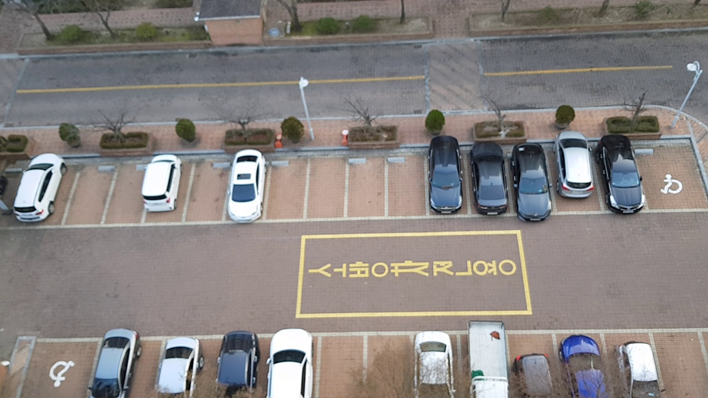

### **Convert Video to Image**

- 영상 1초마다 프레임 추출 (개인별 600~900장)

In [ ]:
if os.getcwd() == '/content' :
  ROOT_PATH = "/content/drive/MyDrive/"+WORK_SPACE+"/**"
else :
  ROOT_PATH = os.path.abspath('..')

In [ ]:
IMAGE = ROOT_PATH + '/**'

In [ ]:
filepath = ROOT_PATH + '/**.mp4'
video = cv2.VideoCapture(filepath)

if not video.isOpened():
    print("Could not Open :", filepath)
    exit(0)

In [ ]:
#불러온 비디오 파일의 정보 출력

length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = video.get(cv2.CAP_PROP_FPS)

print("length :", length)
print("width :", width)
print("height :", height)
print("fps :", fps)

In [ ]:
count = 0

while(video.isOpened()):
    ret, image = video.read()
    if(int(video.get(1)) % int(fps) == 0): #앞서 불러온 fps 값을 사용하여 1초마다 추출
        cv2.imwrite(IMAGE + "/frame%d.jpg" % count, image)
        print('Saved frame number :', str(int(video.get(1))))
        count += 1
        
video.release()

### **Resize Images**

- 이미지 사이즈 : 1280 X 720

In [ ]:
path = "**"
img_list = os.listdir(path)

for i in range(len(img_list)):
  img = cv2.imread(path+"/"+img_list[i])
  img = cv2.resize(img,(1280,720))
  cv2.imwrite(path+"/"+img_list[i], img)

### **Data Annotation**

- annotation tool로 CVAT 사용
- 주차공간에 대해 empty:0, full:1 로 레이블 설정  

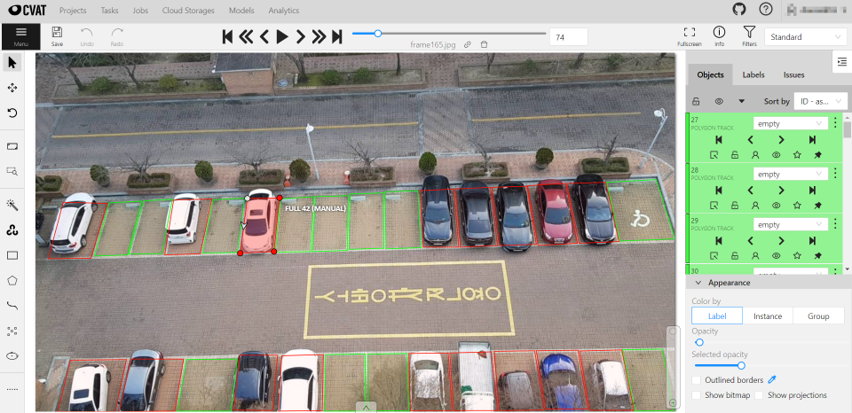

### **JSON to TXT**

- 데이터를 YOLO 모델에 적용하기 위해 어노테이션 완료된 json 파일을 txt 파일로 변환

In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [ ]:
!cd yolov5; pip install -r requirements.txt

In [ ]:
!pwd

In [ ]:
!git clone https://github.com/ssaru/convert2Yolo.git

In [ ]:
!cd convert2Yolo

In [ ]:
!pip install -r requirements.txt

In [ ]:
import zipfile
zipfile.ZipFile("/content/parking_lot.zip").extractall()

In [ ]:
!cd /content/convert2Yolo

In [ ]:
!mkdir /content/yolov5/pretrained

In [ ]:
!python3 example.py \
--datasets COCO \
--img_path /content/convert2Yolo/data/images \
--label /content/convert2Yolo/labels.json \
--convert_output_path /content/convert2Yolo/data/labels \
--img_type ".jpg" \
--manifest_path ./ \
--cls_list_file /content/convert2Yolo/class.names 

In [ ]:
!pwd

In [ ]:
!zip -r /content/labels.zip /content/convert2Yolo/data/labels     # 저장할 폴더 경로, 압축할 폴더 경로